In [1]:
#동일한 데이터로 딥러닝 분류 수행하라. (dense layer 만 사용)

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

df = pd.read_csv("./diabetes.csv", index_col=None)
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.isnull().sum()
df = df.dropna()
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
X=df.drop('Outcome',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
y=df['Outcome']
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
Y = pd.get_dummies(y).values

In [9]:
X = X.values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(32,input_shape=(8,),activation='tanh'))
model.add(Dense(16,activation='tanh'))
model.add(Dense(4,activation='tanh'))
model.add(Dense(2,activation='sigmoid'))

optimizer = Adam()
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/opt/anaconda3/envs/school/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 4)              │            68 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 894 (3.49 KB)

 Trainable params: 894 (3.49 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6474 - loss: 0.6519 - val_accuracy: 0.7208 - val_loss: 0.5936
Epoch 2/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - accuracy: 0.6134 - loss: 0.6512 - val_accuracy: 0.7273 - val_loss: 0.5781
Epoch 3/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 673us/step - accuracy: 0.6335 - loss: 0.6338 - val_accuracy: 0.7338 - val_loss: 0.5753
Epoch 4/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.6106 - loss: 0.6495 - val_accuracy: 0.7403 - val_loss: 0.5731
Epoch 5/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - accuracy: 0.6445 - loss: 0.6172 - val_accuracy: 0.7403 - val_loss: 0.5685
Epoch 6/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.6666 - loss: 0.6111 - val_accuracy: 0.7273 - val_loss: 0.5697
Epoch 7/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - accuracy: 0.6278 - loss: 0.6285 - val_accuracy: 0.7338 - val_loss: 0.5643
Epoch 8/30
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.6407 - loss: 0.6221 - val_accuracy: 0.72

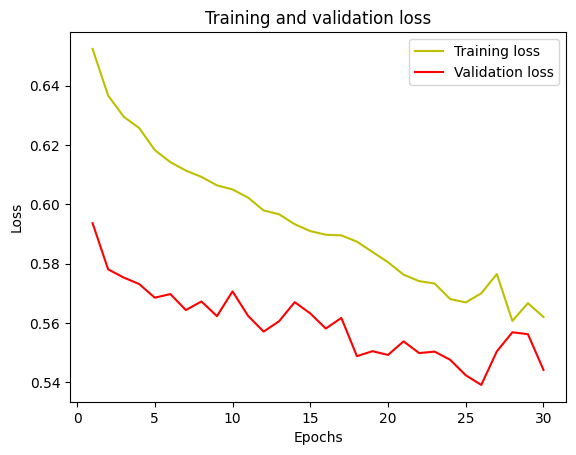

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

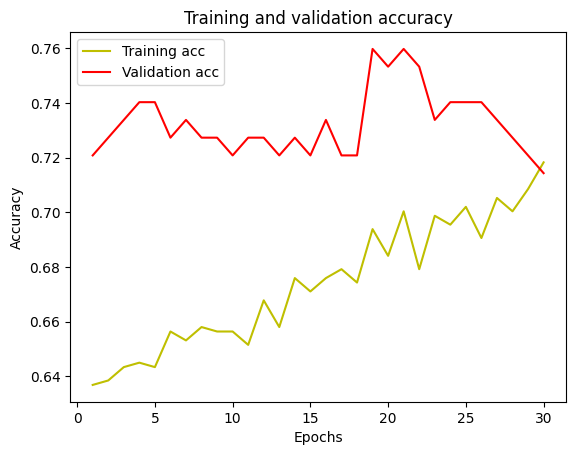

In [21]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81       107
           1       0.55      0.34      0.42        47

    accuracy                           0.71       154
   macro avg       0.65      0.61      0.62       154
weighted avg       0.69      0.71      0.69       154

[[94 13]
 [31 16]]
